<a href="https://colab.research.google.com/github/kaiquedm12/InteligenciaArtificial/blob/main/AlgoritmosGeneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [23]:
## Número de itens - 10
n=10
numero_itens=np.arange(1,n+1)

#Gerando randomicamente os pesos
pesos=[2.5,1.8,0.7,2.1,1.5,2.2,0.9,1.6,0.5,1.1]

#Gerando randomicamente os valores de cada item.
valores=[2000,1450,3400,1900,1300,1000,600,1300,400,900]

nomes=['Smartphone Samsung Galaxy S21',
'Notebook Dell Inspiron 15',
'Fone de Ouvido Bluetooth JBL',
'Smartwatch Samsung Galaxy Watch 3',
'Tablet Apple iPad 10.2',
'Câmera Digital Canon EOS Rebel T7',
'Mouse Gamer Logitech G Pro',
'Teclado Mecânico Redragon Kumara',
'Caixa de Som Bluetooth JBL GO',
'Smartband Xiaomi Mi Band 6']

# definindo o peso máximo para mochila.
max_peso_mochila=7


In [24]:
for i in range (numero_itens.shape[0]):
  print('Item: {} \nPeso(Kg): \nValor($): {} \n'.format(nomes[i], pesos[i], valores[i]))


Item: Smartphone Samsung Galaxy S21 
Peso(Kg): 
Valor($): 2.5 

Item: Notebook Dell Inspiron 15 
Peso(Kg): 
Valor($): 1.8 

Item: Fone de Ouvido Bluetooth JBL 
Peso(Kg): 
Valor($): 0.7 

Item: Smartwatch Samsung Galaxy Watch 3 
Peso(Kg): 
Valor($): 2.1 

Item: Tablet Apple iPad 10.2 
Peso(Kg): 
Valor($): 1.5 

Item: Câmera Digital Canon EOS Rebel T7 
Peso(Kg): 
Valor($): 2.2 

Item: Mouse Gamer Logitech G Pro 
Peso(Kg): 
Valor($): 0.9 

Item: Teclado Mecânico Redragon Kumara 
Peso(Kg): 
Valor($): 1.6 

Item: Caixa de Som Bluetooth JBL GO 
Peso(Kg): 
Valor($): 0.5 

Item: Smartband Xiaomi Mi Band 6 
Peso(Kg): 
Valor($): 1.1 



In [25]:
#Número de soluções ou indivíduos por população
solucao_por_populacao = 8
tamanho_populacao = (solucao_por_populacao,numero_itens.shape[0])

print('Tamanho da população = {}'.format(tamanho_populacao))
print('Numero de indivíduos (soluçao) = {}'.format(tamanho_populacao[0]))
print('Número itens (genes) = {}'.format(tamanho_populacao[1]))

Tamanho da população = (8, 10)
Numero de indivíduos (soluçao) = 8
Número itens (genes) = 10


In [26]:
n_geracoes = 10

populacao_inicial = np.eye(tamanho_populacao[0],tamanho_populacao[1], k=0)

populacao_inicial = populacao_inicial.astype(int)

print('População Inicial:\n {}'.format(populacao_inicial))

População Inicial:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


In [27]:
def cal_fitness(peso, valor, populacao, max_peso_mochila):
    fitness = np.zeros(populacao.shape[0])

    for i in range(populacao.shape[0]):

      s1 = np.sum(populacao[i] * valor)
      s2 = np.sum(populacao[i] * peso)

      if s2 <= max_peso_mochila:
        fitness[i] = s1
      else:
        fitness[i] = 0

    return fitness.astype(float)

In [28]:
cal_fitness(pesos, valores, populacao_inicial, max_peso_mochila)

array([2000., 1450., 3400., 1900., 1300., 1000.,  600., 1300.])

In [29]:
def selecao_roleta(fitness, numero_pais, populacao):
  max_fitness = sum(fitness)

  probabilidades = fitness/max_fitness

  selecionados = populacao[np.random.choice(len(populacao), size=numero_pais, p=probabilidades)]

  return selecionados

In [30]:
def crossover(pais, numero_filhos):
  filhos = np.zeros((numero_filhos, pais.shape[1]))

  ponto_crossover = int(pais.shape[1]/2)

  for k in range(numero_filhos):
    pai_1_idx = k%pais.shape[0]
    pai_2_idx = (k+1)%pais.shape[0]

    filhos[k, 0:ponto_crossover] = pais[pai_1_idx, 0:ponto_crossover]
    filhos[k, ponto_crossover:] = pais[pai_2_idx, ponto_crossover:]

  return filhos

In [31]:
def mutacao(filhos):
  mutacoes = filhos

  for i in range(mutacoes.shape[0]):

    posicao_gene = randint(0, mutacoes.shape[1]-1)

    if mutacoes[i, posicao_gene] == 0:
      mutacoes[i, posicao_gene] = 1
    else:
      mutacoes[i, posicao_gene] = 0

  return mutacoes

In [32]:
def rodar_AG(pesos, valores, populacao, tamanho_populacao, n_geracoes, max_peso_mochila):
  historico_fitness, historico_populacao = [],[]

  numero_pais = int(tamanho_populacao[0]/2)

  numero_filhos = tamanho_populacao[0] - numero_pais
  fitness = []

  for i in range(n_geracoes):
    print('--- Começando a Geração {} ---'.format(i))

    fitness = cal_fitness(pesos, valores, populacao, max_peso_mochila)
    historico_fitness.append(fitness.copy())
    historico_populacao.append(populacao.copy())

    pais = selecao_roleta(fitness, numero_pais, populacao)

    filhos = crossover(pais, numero_filhos)

    filhos_mutados = mutacao(filhos)
    print('População Antiga:')
    print(populacao)
    populacao[0:pais.shape[0],:] = pais
    populacao[pais.shape[0]:,:] = filhos_mutados
    print('População Nova')
    print(populacao)

  return  historico_populacao, historico_fitness

In [ ]:
historico_populacao, historico_fitness = rodar_AG(pesos, valores, populacao_inicial, tamanho_populacao, n_geracoes, max_peso_mochila)

In [35]:
dataframe = pd.DataFrame(historico_fitness)


In [36]:
dataframe

,0,1,2,3,4,5,6,7
0,2000.0,1450.0,3400.0,1900.0,1300.0,1000.0,600.0,1300.0
1,2000.0,3400.0,3400.0,3400.0,2600.0,4400.0,4700.0,4000.0
2,2600.0,3400.0,4700.0,2000.0,3000.0,4400.0,5100.0,3600.0
3,5100.0,4700.0,3600.0,5100.0,5100.0,6700.0,3400.0,6400.0
4,3400.0,5100.0,5100.0,5100.0,4300.0,4700.0,6000.0,6700.0
5,5100.0,4700.0,6700.0,5100.0,5100.0,0.0,1700.0,6000.0
6,6000.0,6000.0,6700.0,6700.0,7000.0,5400.0,0.0,2600.0
7,6000.0,5400.0,6700.0,6700.0,6300.0,2000.0,7600.0,5600.0
8,5400.0,5600.0,6700.0,6000.0,5600.0,0.0,8000.0,6100.0
9,8000.0,5600.0,6700.0,8000.0,0.0,6100.0,7900.0,7100.0


In [37]:
max_index = dataframe.values.argmax()
linha, coluna = np.unravel_index(max_index, dataframe.values.shape)

print('Valor do Fitness (Max)', dataframe.iloc[linha, coluna])
print('Linha do maior Fitness (Geração):', linha)
print('Coluna do maior Fitness (Individuo)', coluna)

Valor do Fitness (Max) 8000.0
Linha do maior Fitness (Geração): 8
Coluna do maior Fitness (Individuo) 6


In [38]:
melhor_individuo = historico_populacao[linha][coluna]

In [39]:
itens_selecionados = numero_itens * melhor_individuo
dataframe_itens = pd.DataFrame(columns=['Item', 'Valor', 'Peso'])

for i in itens_selecionados:
  if i != 0:
    posicao = i - 1
    item = {'Item': nomes[posicao], 'Valor': valores[posicao], 'Peso': pesos[posicao]}
    dataframe_itens.loc[len(dataframe_itens)] = item


In [40]:
dataframe_itens

,Item,Valor,Peso
0,Smartphone Samsung Galaxy S21,2000,2.5
1,Fone de Ouvido Bluetooth JBL,3400,0.7
2,Tablet Apple iPad 10.2,1300,1.5
3,Caixa de Som Bluetooth JBL GO,400,0.5
4,Smartband Xiaomi Mi Band 6,900,1.1


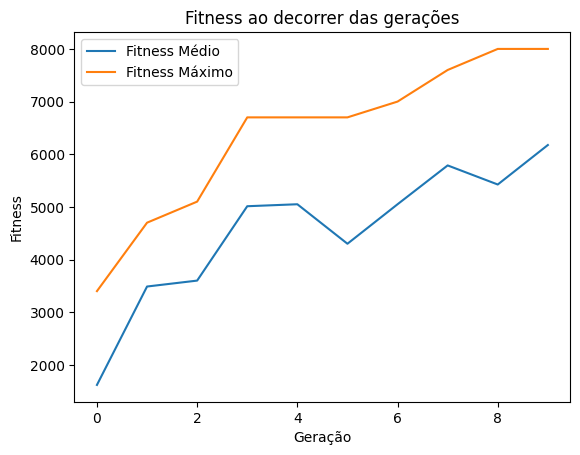

(10, 8)


In [43]:
fitness_medio = [np.mean(fitness) for fitness in historico_fitness]
fitness_max = [np.max(fitness) for fitness in historico_fitness]

plt.plot(list(range(n_geracoes)), fitness_medio, label = 'Fitness Médio')
plt.plot(list(range(n_geracoes)), fitness_max, label = 'Fitness Máximo')
plt.legend()
plt.title('Fitness ao decorrer das gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.show()
print(np.asanyarray(historico_fitness).shape)
